In [1]:
import os
import pandas as pd

#database = 'w3a'
#database = 'abalone'
#database = 'a5a'
#database = 'eunite2001'
database = 'Diabetes'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'damping'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(ridge_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Random_Fourier_features_and_SVC_Diabetes_cv_5.csv', 'Kernel_SVM_Diabetes_cv_5.csv', 'Kernel_ridge_classification_Diabetes_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv']
Ridge files
['Kernel_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_ridge_classification_Diabetes_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv']
SvM files
['Kernel_SVM_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv', 'Random_Fourier_features_and_SVC_Diabetes_cv_5.csv']
Std Score in test


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,damping,File
0,100,768,0.774740,0.039900,0.003876,0.000266,0.776882,0.016686,0.776882,0.036194,0.002638,0.000123,19987.964344,Kernel_SVM_Diabetes_cv_5.csv
1,1,7,0.752604,0.032630,0.004263,0.000881,0.765641,0.013645,0.765641,0.035036,0.002936,0.000176,17653.658446,Nystrom_and_SVC_Diabetes_cv_5.csv
2,2,15,0.773437,0.036920,0.004709,0.001203,0.774273,0.014419,0.774273,0.036108,0.003401,0.000128,16426.310193,Nystrom_and_SVC_Diabetes_cv_5.csv
3,4,30,0.773438,0.041910,0.032354,0.009524,0.774277,0.016392,0.774277,0.035410,0.007457,0.005681,2390.564585,Nystrom_and_SVC_Diabetes_cv_5.csv
4,5,38,0.776042,0.036272,0.026753,0.001721,0.775142,0.016594,0.775142,0.036947,0.011776,0.008861,2900.744728,Nystrom_and_SVC_Diabetes_cv_5.csv
5,7,53,0.774740,0.038162,0.117820,0.028084,0.774280,0.015399,0.774280,0.036018,0.013592,0.005333,657.562558,Nystrom_and_SVC_Diabetes_cv_5.csv
6,9,69,0.773437,0.036920,0.165628,0.041522,0.775150,0.016588,0.775150,0.036039,0.028070,0.018189,466.971956,Nystrom_and_SVC_Diabetes_cv_5.csv
7,10,76,0.773437,0.036920,0.162846,0.030948,0.774273,0.015389,0.774273,0.036535,0.017832,0.009017,474.951566,Nystrom_and_SVC_Diabetes_cv_5.csv
8,12,92,0.774740,0.031974,0.190148,0.020764,0.774726,0.015020,0.774726,0.034322,0.024322,0.010950,407.439926,Nystrom_and_SVC_Diabetes_cv_5.csv
9,13,99,0.773437,0.036920,0.279143,0.005474,0.774280,0.015383,0.774280,0.036178,0.021320,0.008977,277.075752,Nystrom_and_SVC_Diabetes_cv_5.csv


In [2]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe
score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


# Sort by score 

In [3]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
19,Random_Fourier_features_and_ridge_classificati...,4,0.783,30
31,Random_Fourier_features_and_ridge_classificati...,23,0.780,176
29,Random_Fourier_features_and_ridge_classificati...,20,0.777,153
7,Nystrom_and_ridge_classification_Diabetes_cv_5...,10,0.777,76
15,Nystrom_and_ridge_classification_Diabetes_cv_5...,23,0.776,176
16,Nystrom_and_ridge_classification_Diabetes_cv_5...,25,0.775,192
4,Nystrom_and_ridge_classification_Diabetes_cv_5...,5,0.775,38
9,Nystrom_and_ridge_classification_Diabetes_cv_5...,13,0.775,99
13,Nystrom_and_ridge_classification_Diabetes_cv_5...,20,0.775,153
24,Random_Fourier_features_and_ridge_classificati...,12,0.773,92


# Damping

In [4]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
18,Random_Fourier_features_and_ridge_classificati...,2,58769.075,15
1,Nystrom_and_ridge_classification_Diabetes_cv_5...,1,48209.015,7
2,Nystrom_and_ridge_classification_Diabetes_cv_5...,2,43841.278,15
17,Random_Fourier_features_and_ridge_classificati...,1,36318.868,7
19,Random_Fourier_features_and_ridge_classificati...,4,10212.626,30
20,Random_Fourier_features_and_ridge_classificati...,5,4598.571,38
21,Random_Fourier_features_and_ridge_classificati...,7,3140.312,53
4,Nystrom_and_ridge_classification_Diabetes_cv_5...,5,2760.200,38
3,Nystrom_and_ridge_classification_Diabetes_cv_5...,4,2363.186,30
22,Random_Fourier_features_and_ridge_classificati...,9,945.448,69


# Plotting 
## Ridge

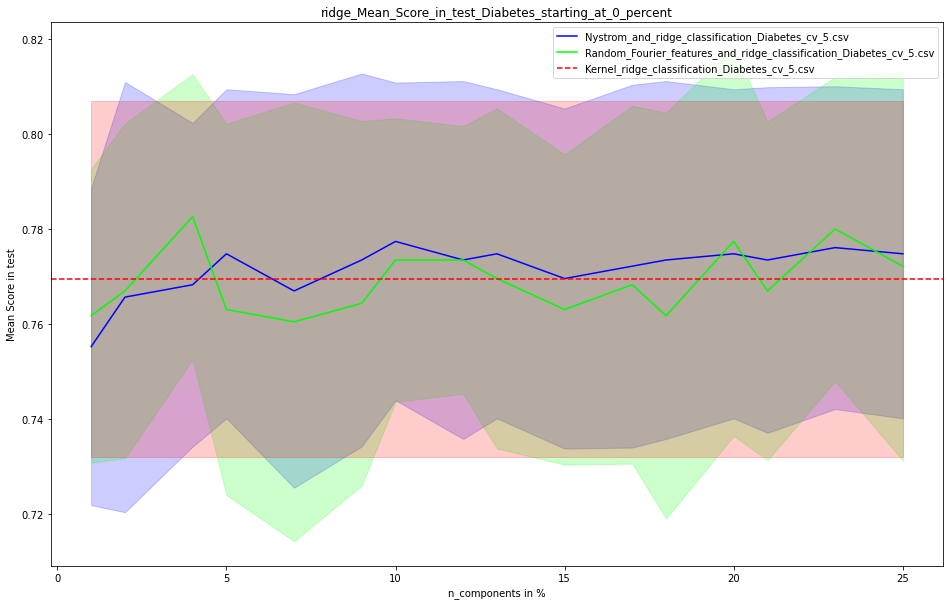

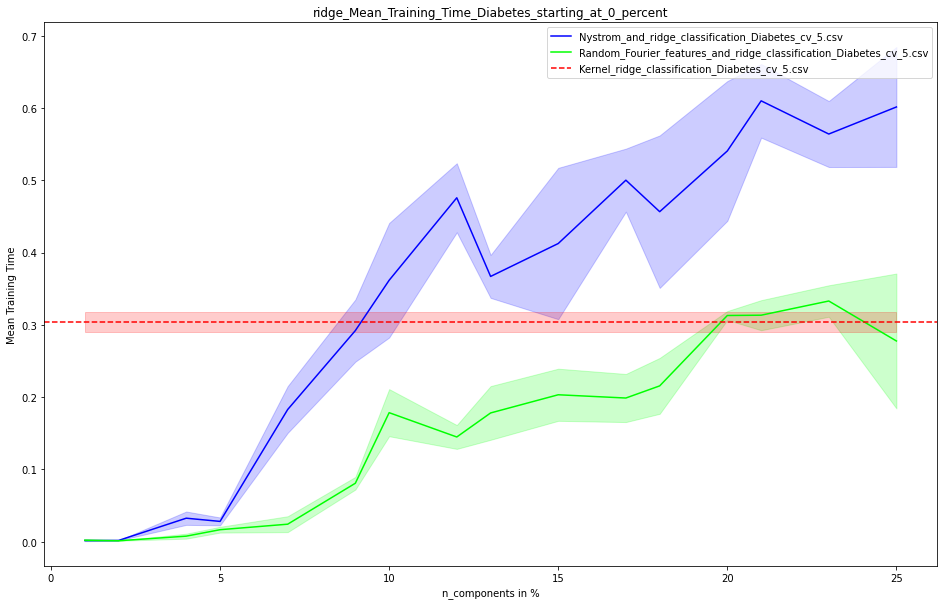

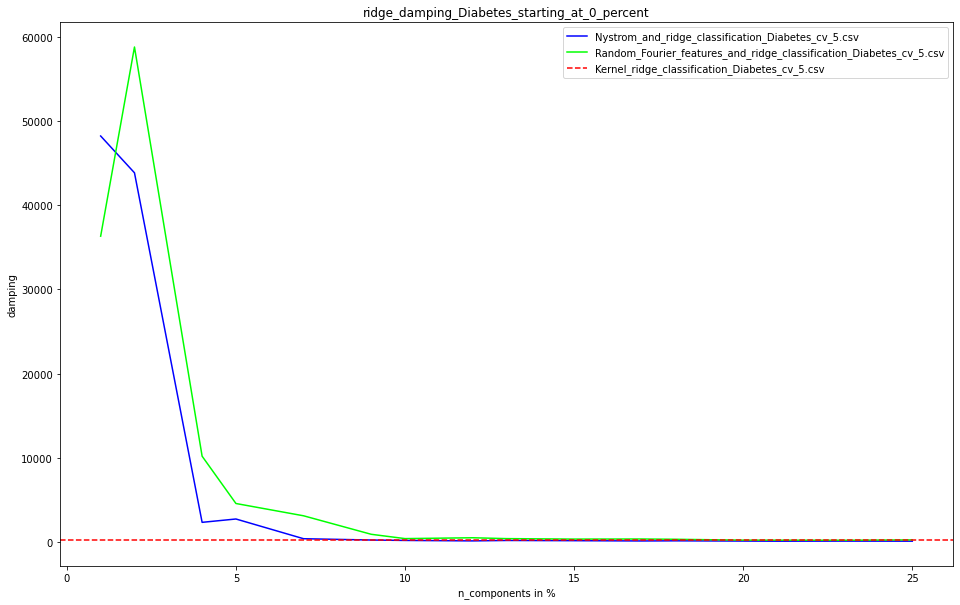

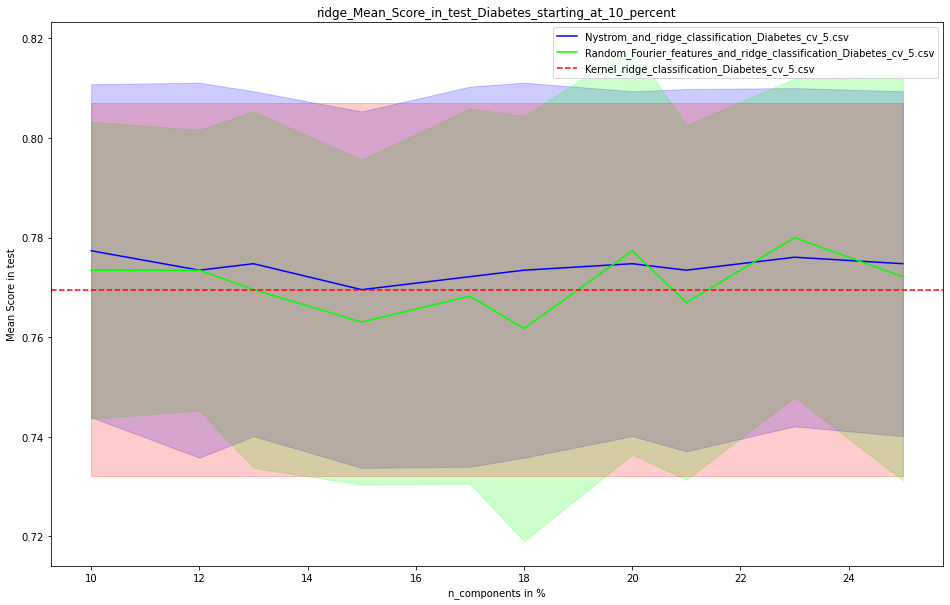

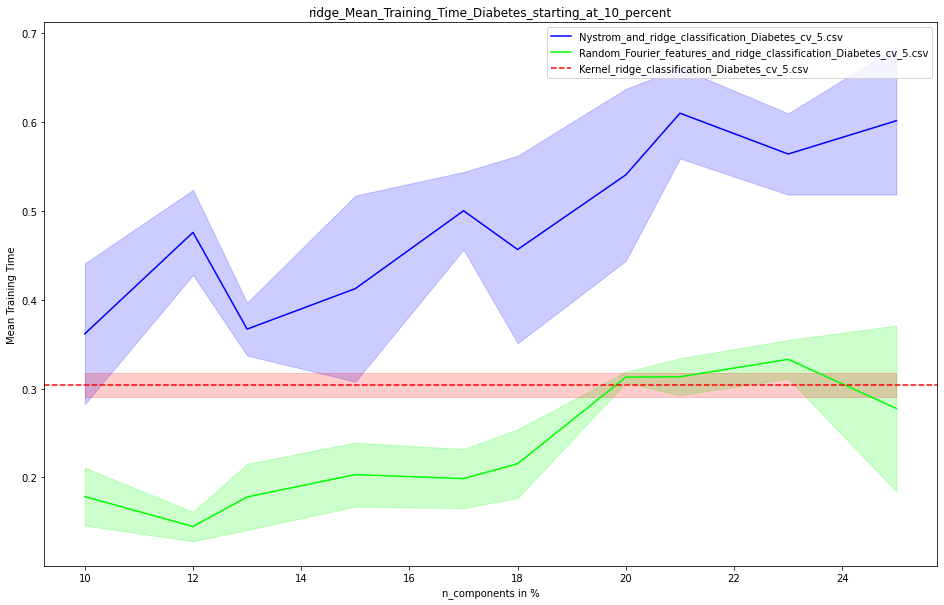

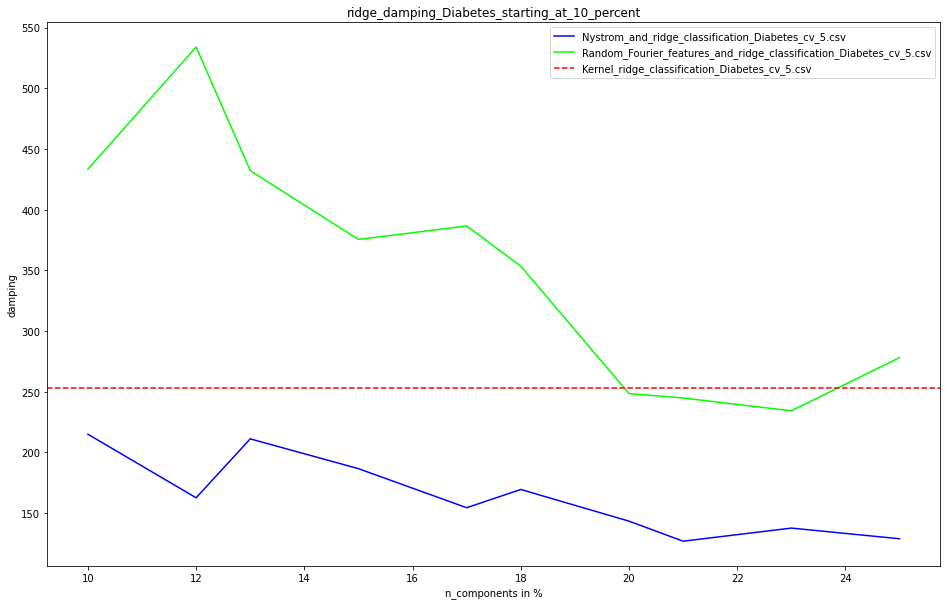

In [5]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
columns = [score_column, time_column, damping_column ]
  


view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0)
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 10)

## SVM 

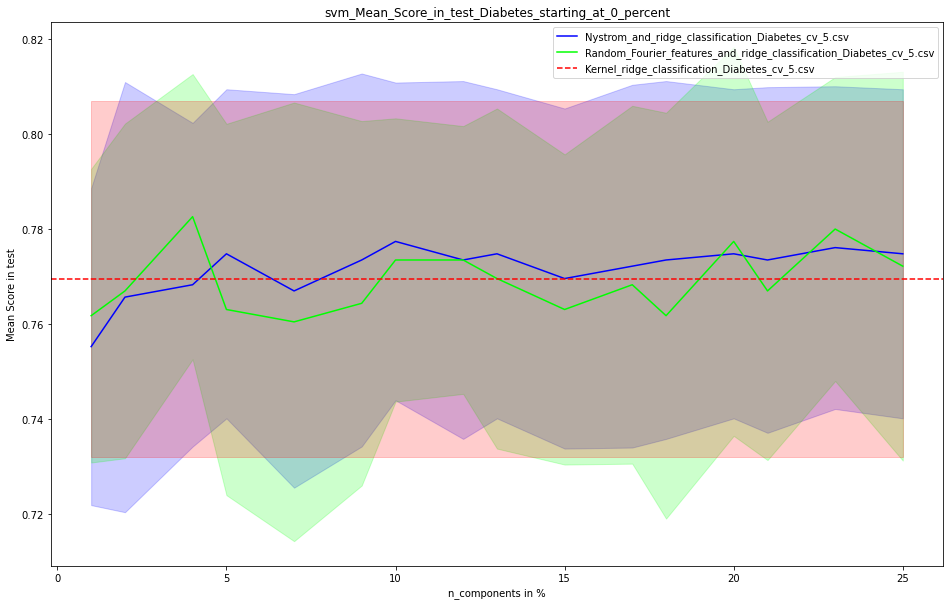

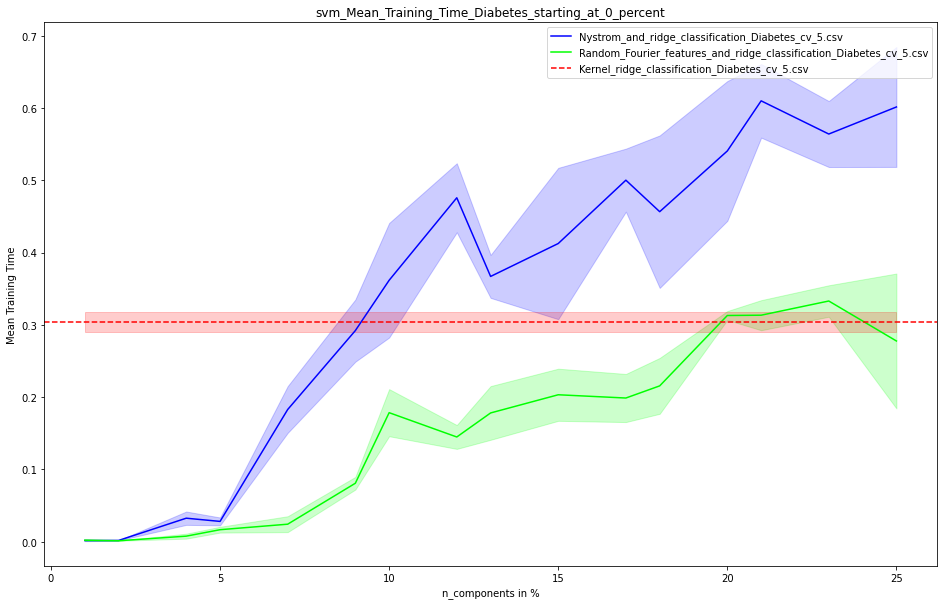

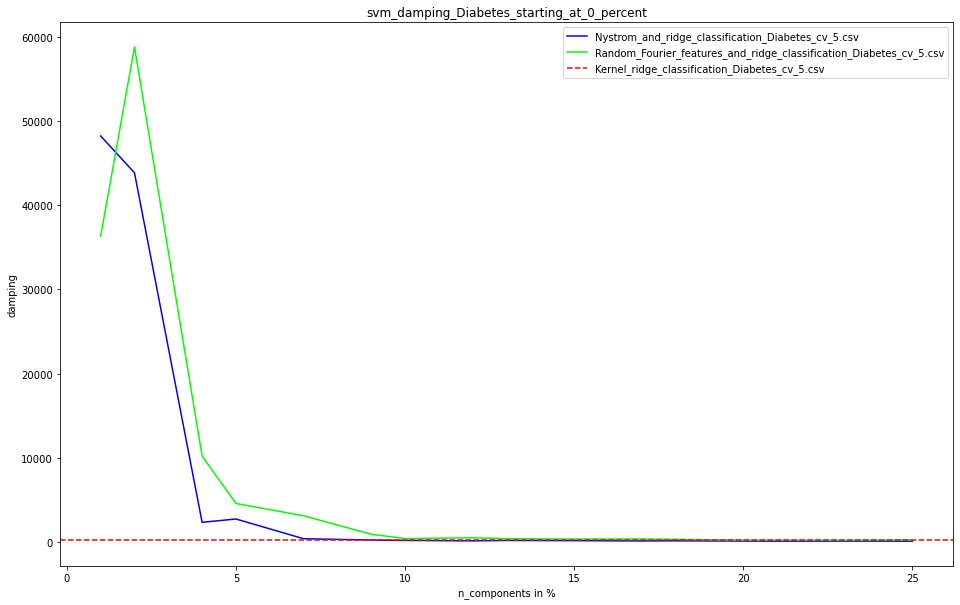

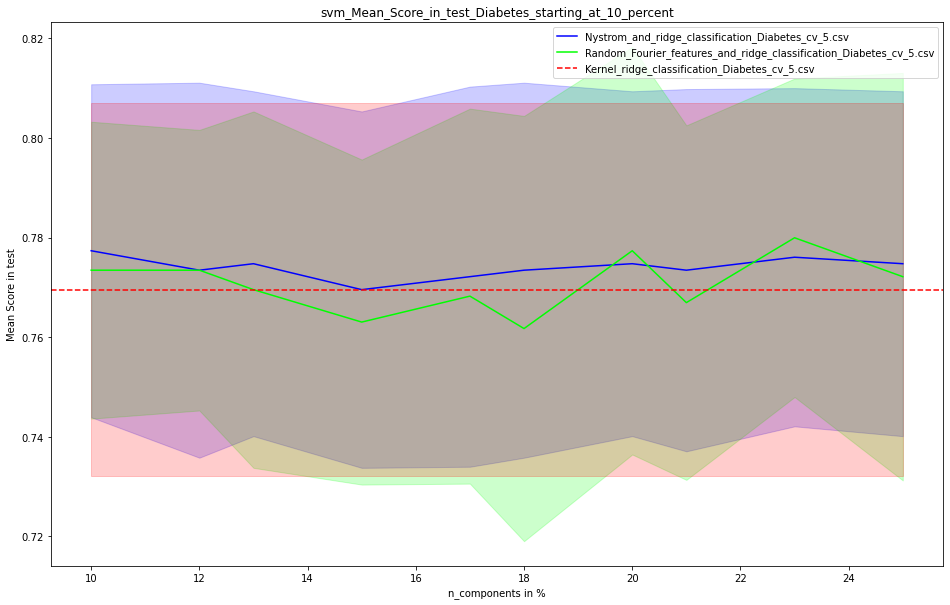

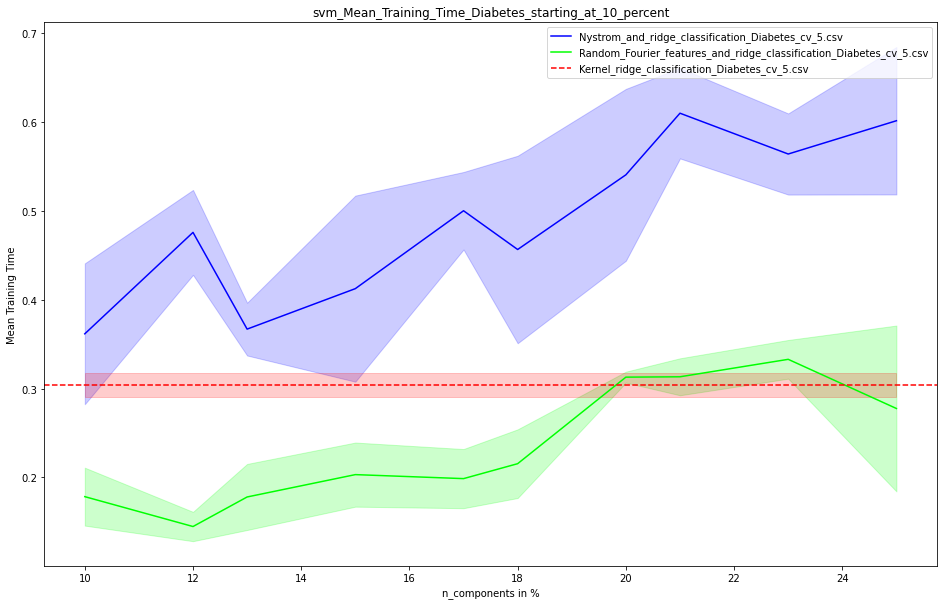

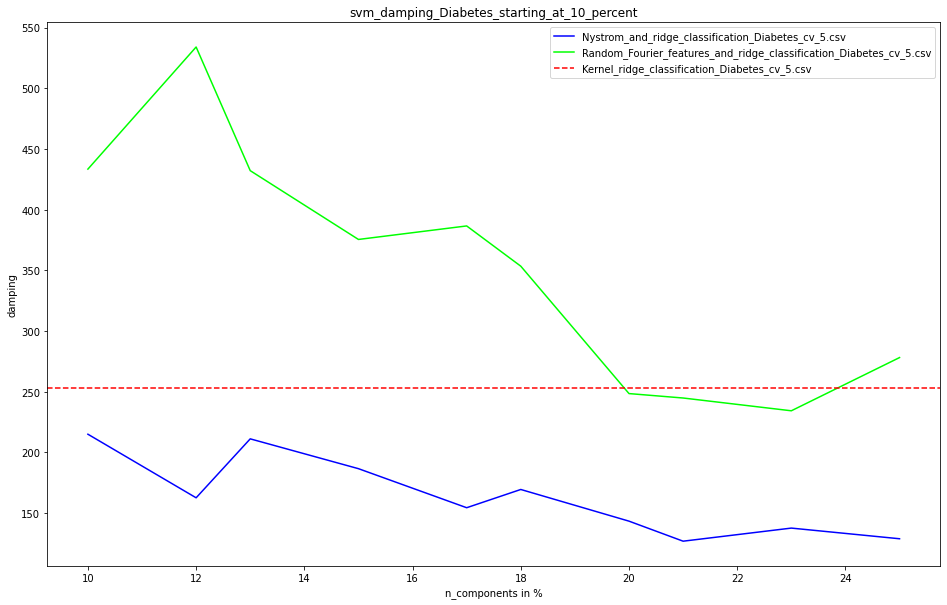

In [8]:
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0)
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 10)

# Hyperparameter

In [7]:
print(show_verbose(svm_data_verbose, n_rows = 20))

                                                              Best Parameters  \
0             {'kernel_svm__C': 1000.0, 'kernel_svm__gamma': 0.0001220703125}   
2                       {'kernel_svm__C': 1.0, 'kernel_svm__gamma': 0.015625}   
3         {'kernel_svm__C': 10.0, 'kernel_svm__gamma': 0.0013810679320049757}   
1         {'kernel_svm__C': 10.0, 'kernel_svm__gamma': 0.0013810679320049757}   
64                {'nystroem__gamma': 0.015625, 'svm__C': 3.1622776601683795}   
..                                                                        ...   
7                              {'nystroem__gamma': 0.015625, 'svm__C': 100.0}   
6                 {'nystroem__gamma': 0.0013810679320049757, 'svm__C': 100.0}   
5                 {'nystroem__gamma': 0.015625, 'svm__C': 3.1622776601683795}   
4                 {'nystroem__gamma': 0.0013810679320049757, 'svm__C': 100.0}   
71  {'fourier_random_features__gamma': 0.005920767837931241, 'svm__C': 100.0}   

                           